# Introduction

This goal of this project is to analyze by-election data from the 2022 Punjab by-election in Pakistan, particularly around the PTI and PMLN parliamentary parties and their respective votes recieved in different districts in this election.

This project will scope, analyze, prepare, plot data, and seek to explain the findings from the analysis.

Here are a few questions that this project has sought to answer:

- What is the distribution of winners overall?
- What is the percentage distribution of votes in each district?
- Are the differences between votes acquired in 2018 and votes acquired in 2022 significant?
- Is the PP7 win by 49 votes a statistical outlier and can it be explained if so?

**Data sources:**

`Election-Data.csv` and the data within is sourced from the Election Commission of Pakistan.

## Scoping

It's beneficial to create a project scope whenever a new project is being started. Four sections were created below to help guide the project's process and progress. The first section is the project goals, this section will define the high-level objectives and set the intentions for this project. The next section is the data, luckily in this project, data is already provided but still needs to be checked if project goals can be met with the available data. Thirdly, the analysis will have to be thought through, which include the methods and questions that are aligned with the project goals. Lastly, evaluation will help us build conclusions and findings from our analysis.

### Project Goals

In this project the perspective will be through a data analyst who is looking for discrepancies within election data.  Some questions that are posed:

- What is the distribution of winners in each district?
- What is the percentage distribution of winners in each district?
- Are the differences between votes acquired in 2018 and votes acquired in 2022 significant?
- Is the PP7 win by 49 votes a statistical outlier and can it be explained if so?

### Data

This project has one data set that I have created using the election commision's data. The `csv` file has information about the votes acquired by the two parties and any independent candidate. This data will be used to analyze the goals of the project. 

### Analysis

In this section, descriptive statistics and data visualization techniques will be employed to understand the data better. Statistical inference will also be used to test if the observed values are statistically significant. Some of the key metrics that will be computed include: 

1. Distributions
1. Counts
1. Relationship between votes

### Evaluation

Lastly, it's a good idea to revisit the goals and check if the output of the analysis corresponds to the questions first set to be answered (in the goals section). This section will also reflect on what has been learned through the process, and if any of the questions were unable to be answered. This could also include limitations or if any of the analysis could have been done using different methodologies.


Importing modules

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

Importing data

In [2]:
df = pd.read_csv('Election-Data.csv')

Inspecting the data and setting the index

In [3]:
df.set_index('District')
df_2018 = df.drop(['PTI_2022', 'PMLN_2022', 'IND_2022'], axis=1)
df_2018.set_index('District')
df_2022 = df.drop(['PTI_2018', 'PMLN_2018', 'IND_2018'], axis=1)
df_2022.set_index('District')

print(df_2022.head())
print(df_2018.head())

  District  PTI_2022  PMLN_2022  IND_2022
0     PP83     50749    43587.0       NaN
1     PP90     77865    66513.0       NaN
2     PP97     67022    54266.0       NaN
3    PP125     82297    47413.0       NaN
4    PP127     71648    47413.0       NaN
  District  PTI_2018  PMLN_2018  IND_2018
0     PP83      8517    47684.0   68959.0
1     PP90     12994    44915.0   59350.0
2     PP97     37932    35298.0   42273.0
3    PP125     38461        NaN   50913.0
4    PP127     26609        NaN   27399.0


Plotting the Voting in each district in 2018 and 2022

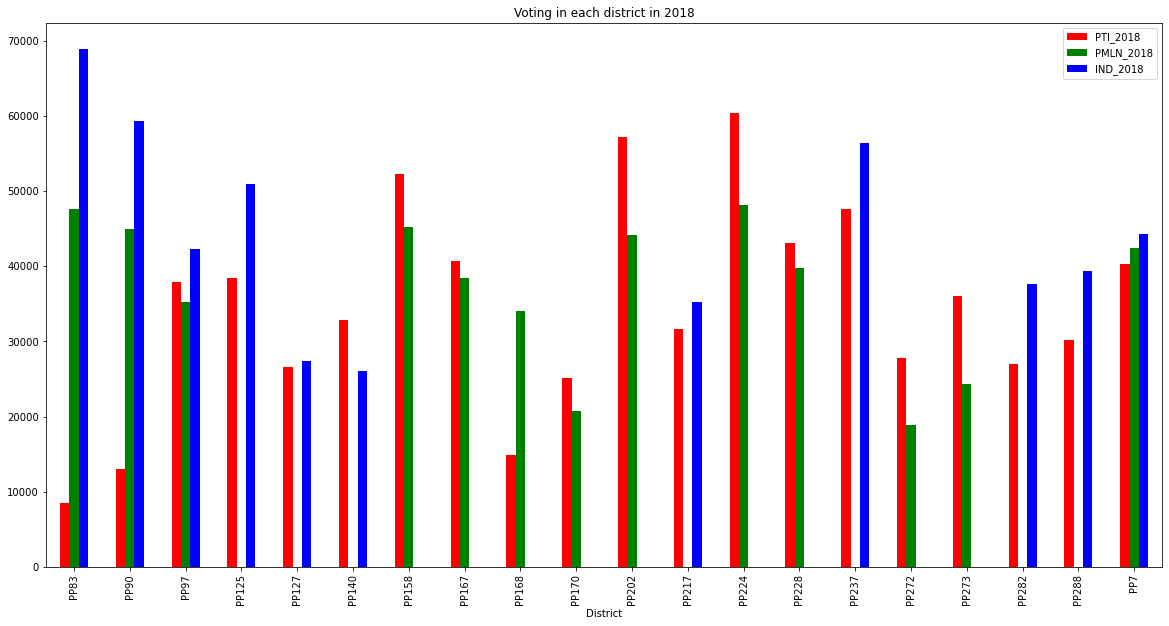

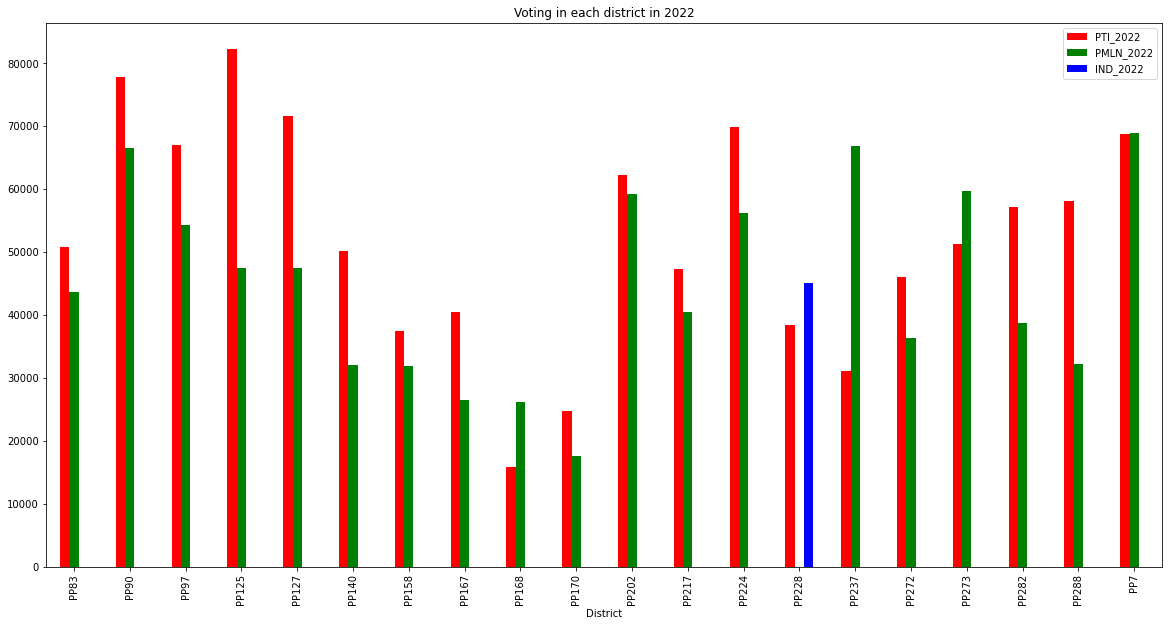

In [4]:
df_2018.plot('District', ['PTI_2018', 'PMLN_2018', 'IND_2018'], kind='bar', figsize=(20,10), color=['red', 'green', 'blue'])
plt.title('Voting in each district in 2018')
plt.show()
df_2022.plot('District', ['PTI_2022', 'PMLN_2022', 'IND_2022'], kind='bar', figsize=(20,10), color=['red', 'green', 'blue'])
plt.title('Voting in each district in 2022')
plt.show()

Calculating the votes of the winner in each district as well as the average change in the amount of votes every winner acquired from 2018 to 2022.

In [5]:
df_2022['Winner_Votes'] = df_2022.max(axis=1)
df_2018['Winner_Votes'] = df_2018.max(axis=1)
print('The average votes of a winner in 2022 was: ' + str(np.mean(df_2022.Winner_Votes)))
print('The average votes of a winner in 2018 was: ' + str(np.mean(df_2018.Winner_Votes)))
percent_change = (df_2022.Winner_Votes.mean() - df_2018.Winner_Votes.mean()) / df_2018.Winner_Votes.mean() * 100
print('This is a change of ' + str(percent_change) + '% from 2018 to 2022')




The average votes of a winner in 2022 was: 55497.25
The average votes of a winner in 2018 was: 43582.5
This is a change of 27.33838123099868% from 2018 to 2022


/var/folders/sk/8r09349d0rn0mzvmmv82s4080000gn/T/ipykernel_28533/2804583932.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_2022['Winner_Votes'] = df_2022.max(axis=1)
/var/folders/sk/8r09349d0rn0mzvmmv82s4080000gn/T/ipykernel_28533/2804583932.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_2018['Winner_Votes'] = df_2018.max(axis=1)


Finding the party of the winner in 2018 and 2022

In [6]:
df_2018_c = df_2018.fillna(0)
df_2018_clean = df_2018_c.drop(['District', 'Winner_Votes'], axis=1)
df_2018_clean
df_2018['Winner'] = df_2018_clean.idxmax(axis=1)

df_2022_c = df_2022.fillna(0)
df_2022_clean = df_2022_c.drop(['District', 'Winner_Votes'], axis=1)
df_2022_clean
df_2022['Winner'] = df_2022_clean.idxmax(axis=1)



Finding the Total Voters in 2018 and 2022 in each district

In [7]:

df_2018['Total_Voters'] = df_2018_clean[list(df_2018_clean.columns)].sum(axis=1)
df_2018[['District', 'Total_Voters']]

,District,Total_Voters
0,PP83,125160.0
1,PP90,117259.0
2,PP97,115503.0
3,PP125,89374.0
4,PP127,54008.0
5,PP140,58891.0
6,PP158,97527.0
7,PP167,79167.0
8,PP168,49054.0
9,PP170,45910.0


In [8]:
df_2022['Total_Voters'] = df_2022_clean[list(df_2022_clean.columns)].sum(axis=1)
df_2022[['District', 'Total_Voters']]


,District,Total_Voters
0,PP83,94336.0
1,PP90,144378.0
2,PP97,121288.0
3,PP125,129710.0
4,PP127,119061.0
5,PP140,82271.0
6,PP158,69369.0
7,PP167,66984.0
8,PP168,41936.0
9,PP170,42207.0


Party of every winner in 2018.

IND_2018     10
PTI_2018      9
PMLN_2018     1
Name: Winner, dtype: int64


Text(0.5, 1.0, 'Distribution of party of winners in 2018')

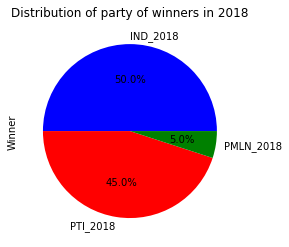

In [9]:
print(df_2018['Winner'].value_counts())
colors=['blue', 'red', 'green']
ax_2 = df_2018['Winner'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=colors)
ax_2.set_title('Distribution of party of winners in 2018')

Party of every winner in 2022

PTI_2022     15
PMLN_2022     4
IND_2022      1
Name: Winner, dtype: int64


Text(0.5, 1.0, 'Distribution of party of winners in 2022')

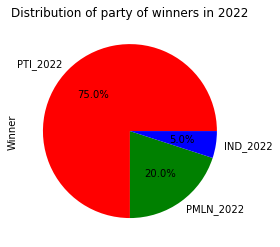

In [10]:
print(df_2022['Winner'].value_counts())
colors=['red', 'green', 'blue']
ax_1 = df_2022['Winner'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=colors)
ax_1.set_title('Distribution of party of winners in 2022')

Calculating the percentage change in voters overall from 2018 to 2022 , as well as the percentage change in the vote recieved for each party

The average percent change in voters was: 16.935513920958904
The average percent change in voters for PTI was: 51.55787958410295
The average percent change in voters for PMLN was: 20.42964070521622
The average percent change in voters for IND was: 1.4965629470525832


Text(0.5, 1.0, 'Percent change in voting averages from 2018 to 2022 for each party and the average')

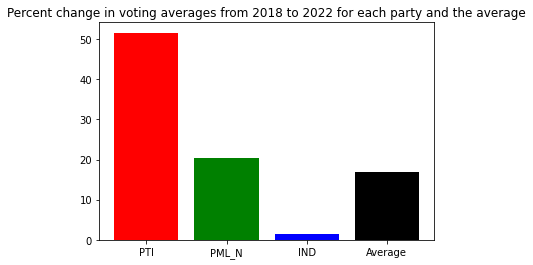

In [11]:
new_percent_change_in_voters = (df_2022.Total_Voters.mean() - df_2018.Total_Voters.mean()) / df_2018.Total_Voters.mean() * 100
new_percent_change_in_PTI = (df_2022.PTI_2022.mean() - df_2018.PTI_2018.mean()) / df_2018.PTI_2018.mean() * 100
new_percent_change_in_PMLN = (df_2022.PMLN_2022.mean() - df_2018.PMLN_2018.mean()) / df_2018.PMLN_2018.mean() * 100
new_percent_change_in_IND = (df_2022.IND_2022.mean() - df_2018.IND_2018.mean()) / df_2018.IND_2018.mean() * 100

print('The average percent change in voters was: ' + str(new_percent_change_in_voters))
print('The average percent change in voters for PTI was: ' + str(new_percent_change_in_PTI))
print('The average percent change in voters for PMLN was: ' + str(new_percent_change_in_PMLN))
print('The average percent change in voters for IND was: ' + str(new_percent_change_in_IND))



all_percent_changes = [new_percent_change_in_PTI, new_percent_change_in_PMLN, new_percent_change_in_IND, new_percent_change_in_voters]
plt.bar(['PTI', 'PML_N', 'IND', 'Average'], all_percent_changes, color=['red', 'green', 'blue' , 'black'])
plt.title('Percent change in voting averages from 2018 to 2022 for each party and the average')




Calculating the allocation of the vote that each party recieved in 2018 as well as 2022

Text(0.5, 1.0, 'Percentage of votes secured in 2022')

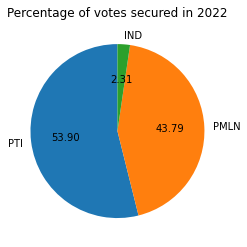

In [12]:
total_pti_2018 = df_2018['PTI_2018'].sum()
total_pmln_2018 = df_2018['PMLN_2018'].sum()
total_ind_2018 = df_2018['IND_2018'].sum()
total_pti_2022 = df_2022['PTI_2022'].sum()
total_pmln_2022 = df_2022['PMLN_2022'].sum()
total_ind_2022 = df_2022['IND_2022'].sum()

total_2018 = [total_pti_2018, total_pmln_2018, total_ind_2018]
total_2022 = [total_pti_2022, total_pmln_2022, total_ind_2022]
plt.pie(total_2022, labels=['PTI', 'PMLN', 'IND'], autopct='%.2f', startangle=90)
plt.title('Percentage of votes secured in 2022')



Text(0.5, 1.0, 'Percentage of votes secured in 2018')

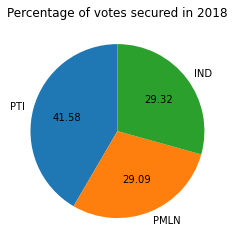

In [13]:
plt.pie(total_2018, labels=['PTI', 'PMLN', 'IND'], autopct='%.2f', startangle=90)
plt.title('Percentage of votes secured in 2018')

Calculating the Percentage Change in Voting for each party in each district from 2018 to 2022 and plotting this information on a scatter plot.

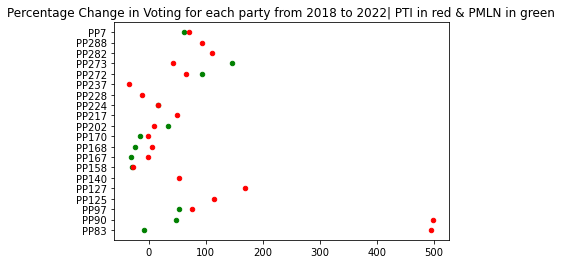

In [14]:
df_merged = df_2022
df_merged['PTI_2018'] = df_2018['PTI_2018']
df_merged['PMLN_2018'] = df_2018['PMLN_2018']
df_merged['IND_2018'] = df_2018['IND_2018']
df_merged['Winner_Votes_2018'] = df_2018['Winner_Votes']
df_merged['Winner_2018'] = df_2018['Winner']
df_merged.rename({'Winner_Votes': 'Winner_Votes_2022', 'Winner': 'Winner_2022'}, axis=1, inplace=True)
df_merged.drop('Total_Voters', axis=1)
re_order_names = ['District', 'PTI_2018', 'PMLN_2018', 'IND_2018', 'Winner_2018', 'Winner_Votes_2018',
                  'PTI_2022', 'PMLN_2022', 'IND_2022', 'Winner_2022', 'Winner_Votes_2022']
new_merged_df = df_merged.reindex(columns = re_order_names)
new_merged_df
comparison_df = new_merged_df[['District', 'PTI_2018', 'PTI_2022', 'PMLN_2018', 'PMLN_2022', 'IND_2018', 'IND_2022']].copy()
comparison_df.set_index('District')

comparison_df['change_in_pti'] = ((comparison_df['PTI_2022'] - comparison_df['PTI_2018'])/ comparison_df['PTI_2018']*100)
comparison_df['change_in_pmln'] = ((comparison_df['PMLN_2022'] - comparison_df['PMLN_2018'])/ comparison_df['PMLN_2018']*100)
plt.scatter(comparison_df['change_in_pmln'], comparison_df['District'], c='green', s=20)
plt.scatter(comparison_df['change_in_pti'], comparison_df['District'], c='red', s=20)
plt.title('Percentage Change in Voting for each party from 2018 to 2022| PTI in red & PMLN in green')

plt.show()

PP7 analysis.
PP7 was awarded to the PMLN with a narrow victory of 49 votes.

The total turnout change in PP7 from 2018 to 2022 was 8.473949024023433%
The total change in PP7 from 2018 to 2022 for PTI was 70.72547852821582%
The total change in PP7 from 2018 to 2022 for PMLN was 62.58317210136378%


<BarContainer object of 3 artists>

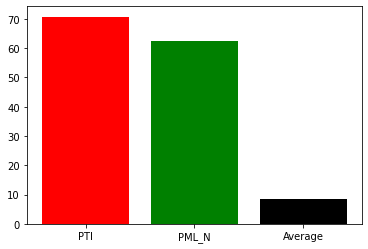

In [15]:
total_turnout_pp7_2022 = df_2022.iloc[19, 6]
total_turnout_pp7_2018 = df_2018.iloc[19, -1]
total_pti_pp7_2018 = comparison_df.iloc[-1, 1]
total_pti_pp7_2022 = comparison_df.iloc[-1, 2]
total_pmln_pp7_2018 = comparison_df.iloc[-1, 3]
total_pmln_pp7_2022 = comparison_df.iloc[-1, 4]




total_turnout_pp7_change = (total_turnout_pp7_2022 - total_turnout_pp7_2018) / total_turnout_pp7_2018 * 100
pti_pp7_change = (total_pti_pp7_2022 - total_pti_pp7_2018) / total_pti_pp7_2018 * 100
pmln_pp7_change = (total_pmln_pp7_2022 - total_pmln_pp7_2018) / total_pmln_pp7_2018 * 100
print('The total turnout change in PP7 from 2018 to 2022 was '+ str(total_turnout_pp7_change) + '%')
print('The total change in PP7 from 2018 to 2022 for PTI was '+ str(pti_pp7_change) + '%')
print('The total change in PP7 from 2018 to 2022 for PMLN was '+ str(pmln_pp7_change) + '%')
percent_changes_pp7 = [pti_pp7_change, pmln_pp7_change, total_turnout_pp7_change]
plt.bar(['PTI', 'PML_N','Average'], percent_changes_pp7, color=['red', 'green','black'])










The total turnout change in PP7 was 8.47%. This is around the half the national average which was 16.93%. Furthermore this discrepency is further seen in the individual party statistics where PMLN experience a total change of 62.583% as compared to 20.43% nationally and PTI experience a total change of 70.73% as compared to 51.56% nationally.

#### Statistical Significance Tests

This section will run some chi-squared tests to see if the 2018 and 2022 votes acquired by each party have statistically significant differences in votes recieved in each year in PP7. In order to run a chi squared test, a contingency table will need to be created. The contingency table should like this:

||2018|2022|
|-|-|-|
|PTI|?|?|
|PMLN|?|?|

The first test will be called `contingency1` and will need to be filled with the correct numbers for votes acquired by PTI and PMLN in PP7.

The results from the chi-squared test returns many values, the second value which is 2.866365238994988e-08 is the p-value. The standard p-value to test statistical significance is 0.05. For the value retrieved from this test, the value of 2.866365238994988e-08 is much lower than 0.05. In the case of votes acquired by PTI and PMLN there does seem to be a significant relationship between them.

In [16]:
from scipy.stats import chi2_contingency

contingency1 = [[40332, 68857],
              [42382, 68906]]
chi2_contingency(contingency1)

(30.795942794524294,
 2.866365238994988e-08,
 1,
 array([[40963.2703003, 68225.7296997],
        [41750.7296997, 69537.2703003]]))

The next pair, is going to test the difference between `PTI` and `PMLN` but in terms of total votes in all districts combined.

The format is again is like below:

||2018|2022|
|-|-|-|
|PTI|?|?|
|PMLN|?|?|

This time the p-value is 0.0 which is below the standard threshold of 0.05 which can be taken to assume that the total votes acquired in 2018 vs 2022 by each party is also statistically significant and there is a significant relationship between them. 

In [17]:
from scipy.stats import chi2_contingency

contingency2 = [[691902, 1048632],
              [484074, 852031]]
chi2_contingency(contingency2)

(3970.726057541644,
 0.0,
 1,
 array([[ 665279.94060532, 1075254.05939468],
        [ 510696.05939468,  825408.94060532]]))

The next pair, is going to test the difference between `PTI` and `PMLN` but in terms of percentage of total votes in all districts combined.

The format is again is like below:

||2018|2022|
|-|-|-|
|PTI|?|?|
|PMLN|?|?|

This time the p-value is 0.75 which is above the standard threshold of 0.05 which can be taken to assume that the total votes acquired in 2018 vs 2022 by each party is not statistically significant and that there is no significant relationship between them.  

In [18]:
from scipy.stats import chi2_contingency

contingency3 = [[41.58, 53.90],
              [29.09, 43.79]]
chi2_contingency(contingency3)

(0.09968796117930509,
 0.7522044145982824,
 1,
 array([[40.07823474, 55.40176526],
        [30.59176526, 42.28823474]]))

# Conclusions
The project was able to make several data visualizations and inferences about the various districts and the votes acquired in each of the districts that comprised this data set.

This project was also able to answer some of the questions first posed in the beginning:

- What is the distribution of winners overall?
The vast majoirty of winners were of the PTI in 2022, whereas in 2018 it was almost evenly split between the PTI and independents.
- What is the percentage distribution of votes in each district?
The vast majority of votes cast in 2022 were cast to the PTI whereas in 2018 the PTI was the largest party in terms of vote allocation but did not have more than 50%. Independent votes saw the sharpest decrease from 29.32% in 2018 to 2.31% in 2022.
- Are the differences between votes acquired in 2018 and votes acquired in 2022 significant?
The differences between the votes were not statistically significant as both the PTI votes and PMLN votes from 2018 to 2022 had a significant relationship.
- Is the PP7 win by 49 votes a statistical outlier and can it be explained if so?
The PP7 seat was not a statistical outlier.


